In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [52]:
candidates = pd.read_csv("candidate_finance.csv")
dems = candidates[candidates['Political Party'] == 'Democratic']
dems['STEM?']

0      Yes
1       No
2       No
3      Yes
4       No
      ... 
557     No
558     No
559     No
560     No
561     No
Name: STEM?, Length: 562, dtype: object

In [53]:
yes_stem = dems[dems['STEM?'] == 'Yes']
no_stem = dems[dems['STEM?'] == 'No']
ystem_prop_wins = len(yes_stem[yes_stem['Won Primary'] == 'Yes'])/len(yes_stem)
nstem_prop_wins = len(no_stem[no_stem['Won Primary'] == 'Yes'])/len(no_stem)

In [54]:
ystem_prop_wins, nstem_prop_wins

(0.25, 0.32494279176201374)

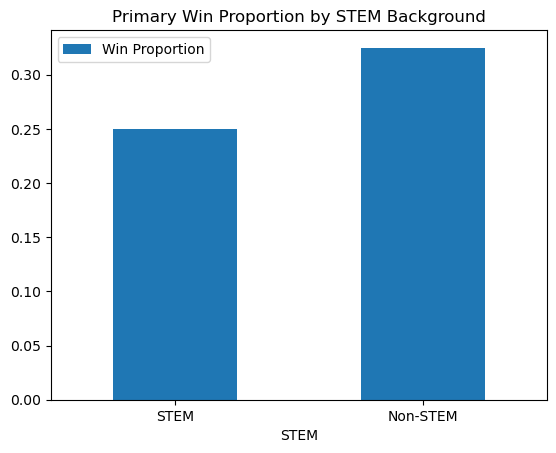

In [55]:
STEM_win_prop = pd.DataFrame({'STEM':['STEM', 'Non-STEM'], 'Win Proportion':[ystem_prop_wins, nstem_prop_wins]})
ax = STEM_win_prop.plot.bar(x='STEM', y='Win Proportion', rot=0)
plt.title('Primary Win Proportion by STEM Background')
plt.show()

In [56]:
ystem_self_funder = len(yes_stem[yes_stem['Self-Funder?'] == 'Yes'])/len(yes_stem)
nstem_self_funder = len(no_stem[no_stem['Self-Funder?'] == 'Yes'])/len(no_stem)
ystem_self_funder, nstem_self_funder

(0.07758620689655173, 0.032036613272311214)

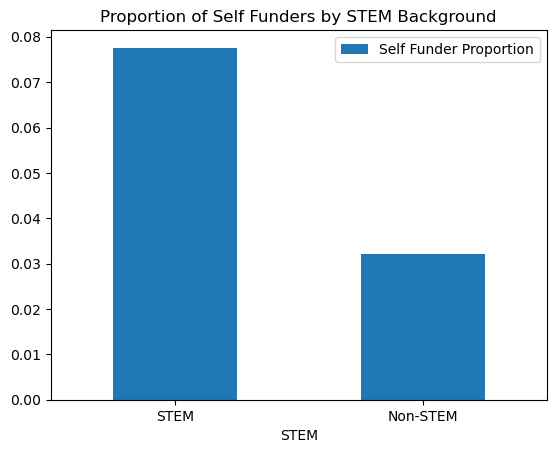

In [57]:
STEM_self_fund = pd.DataFrame({'STEM':['STEM', 'Non-STEM'], 'Self Funder Proportion':[ystem_self_funder, nstem_self_funder]})
ax2 = STEM_self_fund.plot.bar(x='STEM', y='Self Funder Proportion', rot=0)
plt.title('Proportion of Self Funders by STEM Background')
plt.show()

## Question 2 Results

In [140]:
relevant_vs = dems[['STEM?', 'Won Primary', 'Self-Funder?', 'Race', 'Partisan Lean', "Cand_Contribution", "Cand_Loan"]]
relevant_vs.replace(('Yes', 'No'), (1, 0), inplace=True)
relevant_vs.replace(('White', 'Nonwhite'), (1, 0), inplace=True)
filtered_dems = relevant_vs.dropna()

/tmp/ipykernel_462/337958516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_vs.replace(('Yes', 'No'), (1, 0), inplace=True)
/tmp/ipykernel_462/337958516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_vs.replace(('White', 'Nonwhite'), (1, 0), inplace=True)


In [141]:
# Making Arrays
z = filtered_dems['STEM?'].array
y = filtered_dems['Won Primary'].array
x = filtered_dems.iloc[:, 2:].to_numpy()


In [142]:
# import regression
from sklearn.linear_model import LogisticRegression as LR
lr = LR(penalty='none', max_iter=200, random_state=0)

In [143]:
# 3. Fit the model
ex_model = lr.fit(x, z)
ex_model.coef_

/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


array([[ 2.36166653e-05, -1.03720073e-03,  2.01271129e-02,
        -3.42872272e-06, -8.94950130e-08]])

In [144]:
def estimate_treatment_effect(LR, X, Y, Z):
    ex_model = LR.fit(X, Z)
    exs = ex_model.predict_proba(X)
    sum = 0
    for n in np.arange(len(X)):
        sum += (Z[n] * Y[n]/exs[n][1]) - ((1 - Z[n])*Y[n]/(1 - exs[n][1]))

    return sum/len(Z)

In [145]:
estimate_treatment_effect(lr, x, y, z)

/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


-0.31048787787364374